In [19]:
import pandas as pd

df = pd.read_csv("movie_success_sample_dataset.csv")
df.head()


,Title,Genre,Director,Budget,Revenue,IMDB_Rating,Review
0,Movie 1,Action,Director B,61775559,262819013,7.7,A decent movie with good direction.
1,Movie 2,Action,Director A,60131327,7150684,5.3,Amazing movie with great visuals and acting.
2,Movie 3,Drama,Director B,70203550,67974054,9.4,Loved the characters and the storyline.
3,Movie 4,Romance,Director C,77732425,292278101,6.9,Amazing movie with great visuals and acting.
4,Movie 5,Romance,Director A,82511221,270168521,3.6,Loved the characters and the storyline.


In [20]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1000 non-null   object 
 1   Genre        1000 non-null   object 
 2   Director     1000 non-null   object 
 3   Budget       1000 non-null   int64  
 4   Revenue      1000 non-null   int64  
 5   IMDB_Rating  1000 non-null   float64
 6   Review       1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


,0
Title,0
Genre,0
Director,0
Budget,0
Revenue,0
IMDB_Rating,0
Review,0


In [21]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Drop duplicates if found
df.drop_duplicates(inplace=True)


Title          0
Genre          0
Director       0
Budget         0
Revenue        0
IMDB_Rating    0
Review         0
dtype: int64
Duplicates: 0


In [22]:
# Convert to numeric if needed
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')



In [23]:
df['Profit'] = df['Revenue'] - df['Budget']
df['ROI'] = df['Profit'] / df['Budget']


In [24]:
# One-hot encoding for Genre
df = pd.get_dummies(df, columns=['Genre'])



In [25]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[(df['Revenue'] >= Q1 - 1.5 * IQR) & (df['Revenue'] <= Q3 + 1.5 * IQR)]


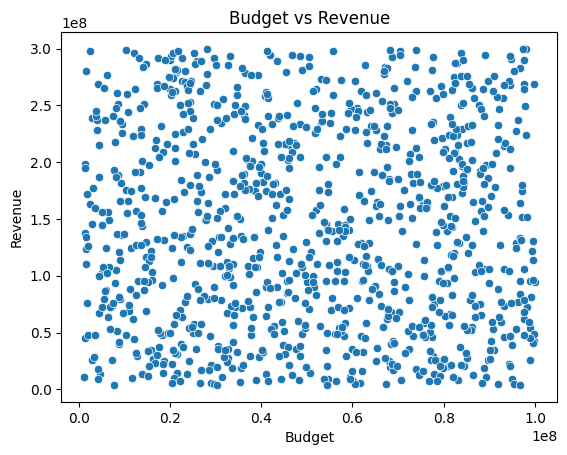

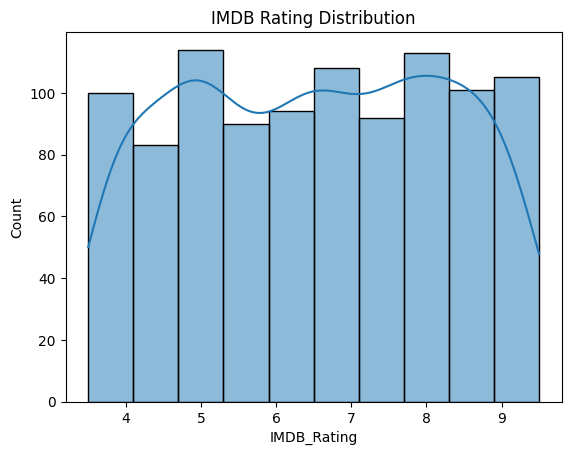

<Axes: title={'center': 'Profit'}, xlabel='Genre_Action'>

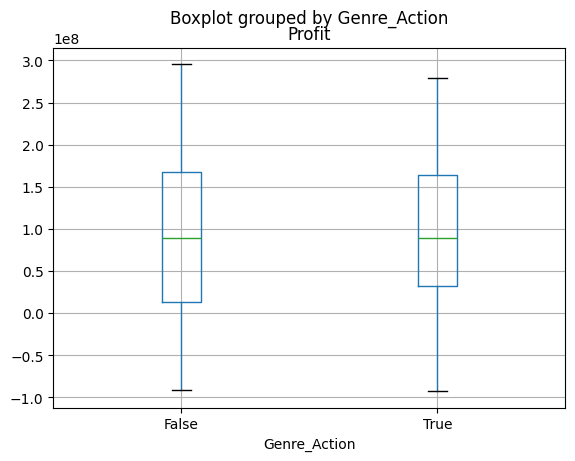

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Budget vs Revenue
sns.scatterplot(x='Budget', y='Revenue', data=df)
plt.title('Budget vs Revenue')
plt.show()

# IMDB Rating distribution
sns.histplot(df['IMDB_Rating'], bins=10, kde=True)
plt.title('IMDB Rating Distribution')
plt.show()

# Profit by Genre
df.boxplot(column='Profit', by='Genre_Action')  # Example for one-hot genre


**SENTIMENT ANALYSIS**

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER Lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring on the 'Review' column of df
df['compound'] = df['Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Optional: Add sentiment labels
df['sentiment'] = df['compound'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

# Preview the sentiment analysis result
df[['Title', 'Review', 'compound', 'sentiment']].head()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,Review,compound,sentiment
0,Movie 1,A decent movie with good direction.,0.4404,positive
1,Movie 2,Amazing movie with great visuals and acting.,0.8360,positive
2,Movie 3,Loved the characters and the storyline.,0.5994,positive
3,Movie 4,Amazing movie with great visuals and acting.,0.8360,positive
4,Movie 5,Loved the characters and the storyline.,0.5994,positive


**Model Building (Regression)**

In [30]:
required_cols = ['budget', 'imdb_rating', 'compound_sentiment']
for col in required_cols:
    if col not in df.columns:
        print(f"Missing column: {col}")


Missing column: budget
Missing column: imdb_rating
Missing column: compound_sentiment


In [32]:
df.to_csv("cleaned_movie_data.csv", index=False)
df.head()


,Title,Director,Budget,Revenue,IMDB_Rating,Review,Profit,ROI,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Romance,Genre_Thriller,compound,sentiment
0,Movie 1,Director B,61775559,262819013,7.7,A decent movie with good direction.,201043454,3.254417,True,False,False,False,False,False,0.4404,positive
1,Movie 2,Director A,60131327,7150684,5.3,Amazing movie with great visuals and acting.,-52980643,-0.881082,True,False,False,False,False,False,0.8360,positive
2,Movie 3,Director B,70203550,67974054,9.4,Loved the characters and the storyline.,-2229496,-0.031758,False,False,True,False,False,False,0.5994,positive
3,Movie 4,Director C,77732425,292278101,6.9,Amazing movie with great visuals and acting.,214545676,2.760054,False,False,False,False,True,False,0.8360,positive
4,Movie 5,Director A,82511221,270168521,3.6,Loved the characters and the storyline.,187657300,2.274325,False,False,False,False,True,False,0.5994,positive
